<a href="https://colab.research.google.com/github/sitikharomah/Tugas-Besar-DL/blob/main/%22Implementasi_Convolutional_Neural_Network_(CNN)_dalam_Megklasifikasi_kelas_hama_pada_selada_menggunakan_arsitektur_DenseNet_dan_EfficientNet%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# PERSIAPAN DATA

In [ ]:
data_dir = "/content/drive/MyDrive/DATASET SELADA"  # Folder utama berisi 3 folder kelas
img_size = 224
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 783 images belonging to 3 classes.
Found 194 images belonging to 3 classes.


# MODEL DENSENET121

In [ ]:
base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_densenet.trainable = False

model_densenet = Sequential([
    base_densenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_densenet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model DenseNet121")
model_densenet.fit(train_gen, epochs=10, validation_data=val_gen)


Training Model DenseNet121


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 276s 5s/step - accuracy: 0.5658 - loss: 0.9471 - val_accuracy: 0.7784 - val_loss: 0.5103
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.9053 - loss: 0.3629 - val_accuracy: 0.8402 - val_loss: 0.3557
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.9284 - loss: 0.2432 - val_accuracy: 0.8402 - val_loss: 0.3495
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.9701 - loss: 0.1748 - val_accuracy: 0.8711 - val_loss: 0.2796
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.9542 - loss: 0.1443 - val_accuracy: 0.8763 - val_loss: 0.2879
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.9548 - loss: 0.1390 - val_accuracy: 0.8866 - val_loss: 0.2357
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.9717 - loss: 0.1122 - val_accuracy: 0.9175 - val_loss: 0.1807
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.9653 - loss: 0.0998 - val_accuracy: 0.8763 - v

# MODEL EFFICIENTNETB0

In [ ]:
base_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_efficientnet.trainable = False

model_efficientnet = Sequential([
    base_efficientnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_efficientnet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model EfficientNetB0")
model_efficientnet.fit(train_gen, epochs=10, validation_data=val_gen)



Training Model EfficientNetB0
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.3185 - loss: 1.1107 - val_accuracy: 0.3505 - val_loss: 1.1007
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.3260 - loss: 1.0996 - val_accuracy: 0.3505 - val_loss: 1.0983
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.3480 - loss: 1.1012 - val_accuracy: 0.3505 - val_loss: 1.1048
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.3450 - loss: 1.1184 - val_accuracy: 0.3505 - val_loss: 1.1020
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.3492 - loss: 1.1014 - val_accuracy: 0.3402 - val_loss: 1.0986
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.3589 - loss: 1.1021 - val_accuracy: 0.3093 - val_loss: 1.1031
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.2999 - loss: 1.1087 - val_accuracy: 0.3402 - val_loss: 1.1002
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.3462 - loss: 1.

# VISUALISASI KELAS

In [ ]:
class_labels = list(train_gen.class_indices.keys())

print("\nKelas yang terdeteksi:")
for label, index in train_gen.class_indices.items():
    print(f"{index}: {label}")


Kelas yang terdeteksi:
0: BUSUK_AKAR
1: BUSUK_BATANG
2: MATA_KODOK


# CONFUSION MATRIX & KLASIFIKASI

EfficientNetB0

13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step

Classification Report (EfficientNetB0):
              precision    recall  f1-score   support

  BUSUK_AKAR       0.00      0.00      0.00        66
BUSUK_BATANG       0.00      0.00      0.00        60
  MATA_KODOK       0.35      1.00      0.52        68

    accuracy                           0.35       194
   macro avg       0.12      0.33      0.17       194
weighted avg       0.12      0.35      0.18       194



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


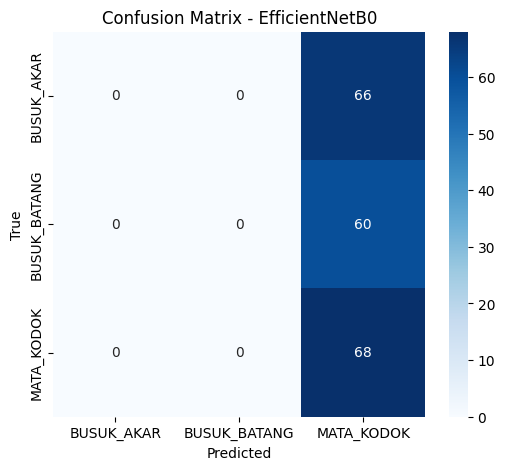

In [ ]:
# EfficientNetB0
pred_efficientnet = model_efficientnet.predict(val_gen)
y_true = val_gen.classes
y_pred = np.argmax(pred_efficientnet, axis=1)

print("\nClassification Report (EfficientNetB0):")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - EfficientNetB0')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


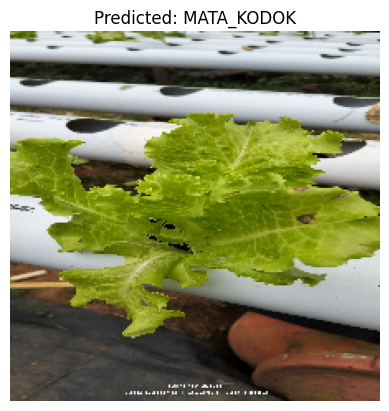

In [ ]:
predict_image("model_efficientnet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/MATA_KODOK/IMG20241130165217.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


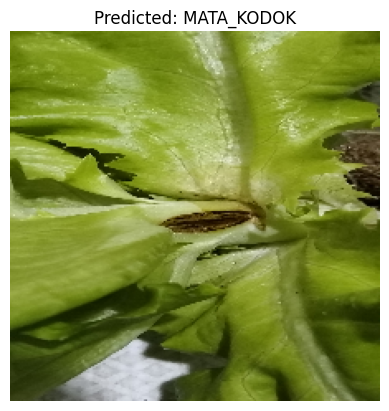

In [ ]:
predict_image("model_efficientnet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_BATANG/IMG20250115214419.jpg")


13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step

Classification Report (DenseNet121):
              precision    recall  f1-score   support

  BUSUK_AKAR       0.99      1.00      0.99        66
BUSUK_BATANG       1.00      0.65      0.79        60
  MATA_KODOK       0.77      1.00      0.87        68

    accuracy                           0.89       194
   macro avg       0.92      0.88      0.88       194
weighted avg       0.92      0.89      0.89       194



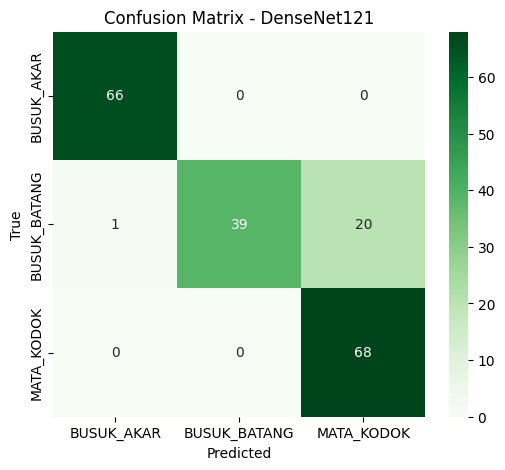

In [ ]:
# DenseNet121
pred_densenet = model_densenet.predict(val_gen)
y_pred_densenet = np.argmax(pred_densenet, axis=1)

print("\nClassification Report (DenseNet121):")
print(classification_report(y_true, y_pred_densenet, target_names=class_labels))

cm2 = confusion_matrix(y_true, y_pred_densenet)
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - DenseNet121')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


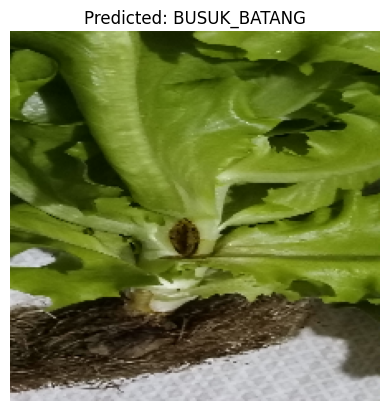

In [ ]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_BATANG/IMG20250115214851_01.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


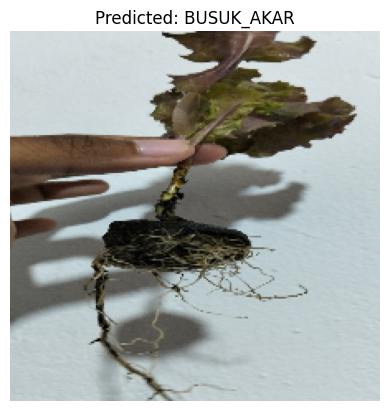

In [ ]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_AKAR/IMG20250115203907.jpg")


# SIMPAN MODEL

In [ ]:
model_densenet.save("model_densenet_selada.h5")
model_efficientnet.save("model_efficientnet_selada.h5")

# PREDIKSI CITRA TUNGGAL

In [ ]:
def predict_image(model_path, image_path):
    model = load_model(model_path)
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()